In [1]:
import pandas as pd
import pandas.io.sql as pd_sql
from pandas import Series, DataFrame, Panel
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from pylab import *
import datetime as date
import scipy.optimize
import scipy.stats
import seaborn as sns
import glob2, os
import matplotlib.patches as mpatches

# Set options to allow for better display in the iPython notebook
% matplotlib inline
plt.rcParams.update({'figure.figsize':[12,10]})
plt.rcParams['font.family'] = 'Arial'
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10
pd.options.display.max_colwidth = 50

//anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
filename = 'VegetationDataComplete_2011_2018.xlsx'
sheet_names = pd.ExcelFile(filename).sheet_names

for file in [filename]:
    sheets = pd.ExcelFile(file).sheet_names  ## get  the names of all the sheets in the excel file(s)
    
    for sheet in sheets:
        if sheet == 'All Data':
            df = pd.read_excel(file, sheet, na_values=['NA'])
        else:
            continue

In [3]:
#df.loc[(df.Species=="NONE"),'Invasive/Native'] = 'NV'

IN_df = df.groupby(['Year','Invasive/Native']).agg({'Species': 'count'})
IN_df['Percentage'] = IN_df.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
IN_df['Richness'] = df.groupby(['Year','Invasive/Native']).agg({'Species': 'nunique'})

natives = ['DISSPI','FRASAL','JAUCAR','LIMCAL','SALPAC']
invasives = ['CAREDU','COTCOR','GENMON','GERDIS','LOTCOR','PHAAQU']

native_df = df[df['Species'].isin(natives)]
inv_df = df[df['Species'].isin(invasives)]

nonedf = pd.DataFrame(df.loc[(df['Species'] == "NONE")])

#df.loc[(df.Species=="NONE"),'Invasive/Native'] = 'NV'



IN_df.to_excel('IN_pcts.xlsx')

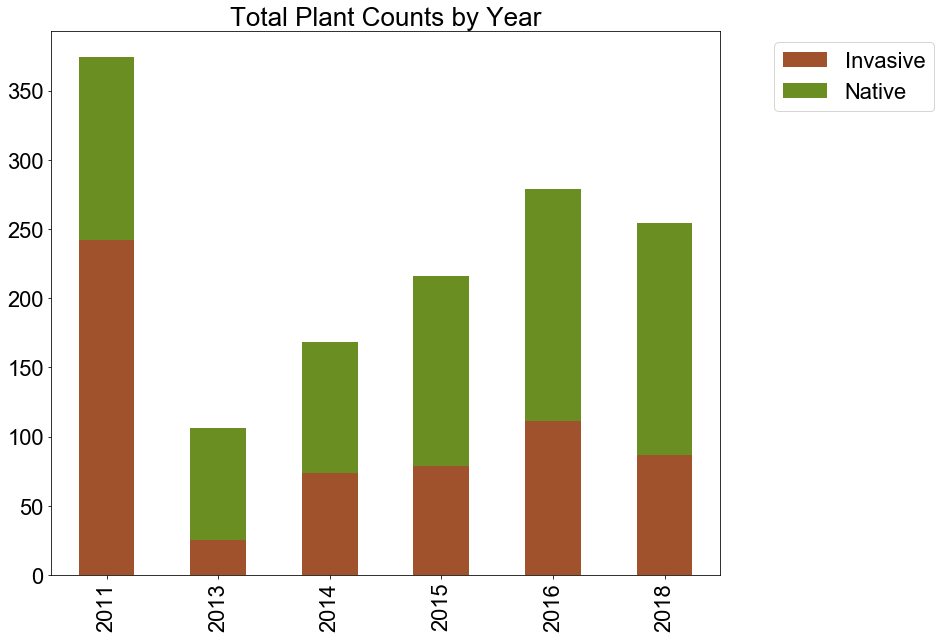

In [346]:
fig = plt.figure(1)
ax = fig.add_subplot(111)

a = df.groupby(['Year','Invasive/Native']).count()['Species'].unstack()

a.plot(
    kind='bar',
    stacked=True,
    xticks  = unique(df.Year.values), 
    color = ['sienna','olivedrab','gray'],
    fontsize= 22,
    ax=ax
)

ax.set_title("Total Plant Counts by Year", size=26)
ax.set_xlabel("")
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, ['Invasive','Native','Not Vegetated'],fontsize=22, loc='upper center', bbox_to_anchor=(1.2,1))

 
# show it
plt.savefig('VegAreaBar.jpg', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()

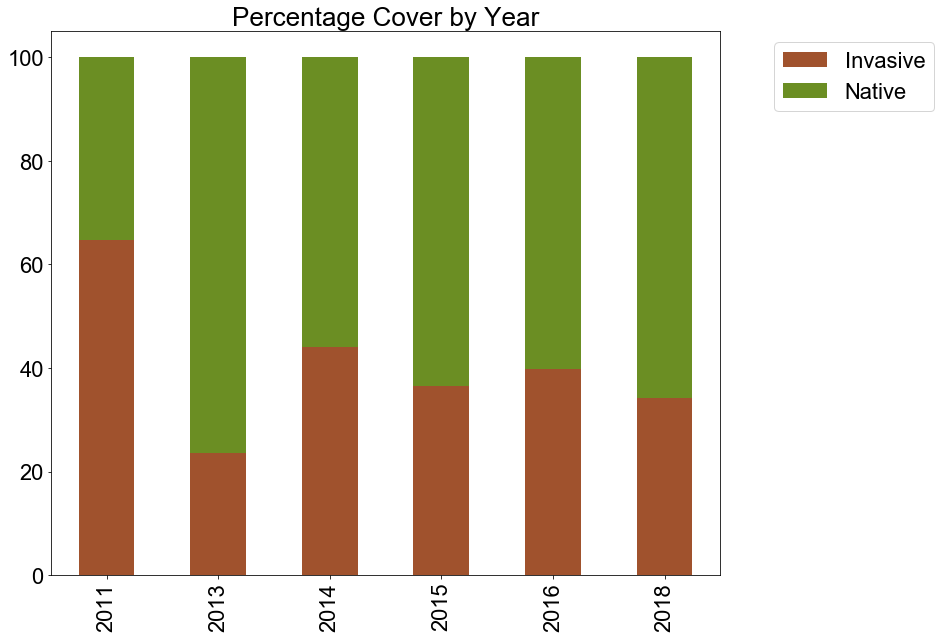

In [348]:

fig = plt.figure(1)
ax = fig.add_subplot(111)

a = IN_df['Percentage'].unstack()

a.plot(
    kind='bar',
    stacked=True,
    xticks  = unique(df.Year.values), 
    color = ['sienna','olivedrab','gray'],
    fontsize=22,
    ax=ax
)

ax.set_xlabel("")
ax.set_title("Percentage Cover by Year", size=26)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, ['Invasive','Native','Not Vegetated'],fontsize=22, loc='upper center', bbox_to_anchor=(1.2,1))

# show it
plt.savefig('VegAreaPCTBar.jpg', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()

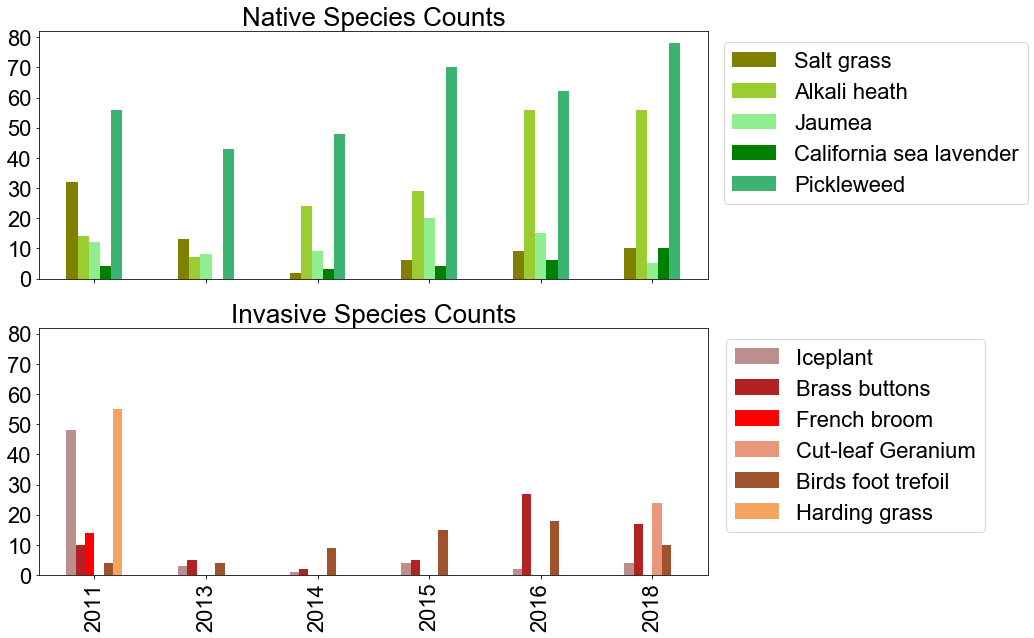

In [354]:

fig, (ax,ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
#ax = fig.add_subplot(211)
#|ax2 = fig.add_subplot(212)

a = native_df.groupby(['Year','Species']).agg({'Species': 'count'}).unstack()

a.plot(kind='bar', 
    stacked=False,
    xticks  = unique(df.Year.values),
    color = ['olive','yellowgreen','lightgreen','g','mediumseagreen'],
    fontsize = 22,
    ax=ax)
 
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, [
    'Salt grass',
    'Alkali heath',
    'Jaumea' ,
    'California sea lavender',
    'Pickleweed'], 
                
    loc='upper center', bbox_to_anchor=(1.25,1), fontsize=22)

ax.set_title("Native Species Counts", fontsize=26)

b = inv_df.groupby(['Year','Species']).agg({'Species': 'count'}).unstack()

b.plot(kind='bar', 
    stacked=False,
    xticks  = unique(df.Year.values), 
    color = ['rosybrown','firebrick','red','darksalmon','sienna','sandybrown'],
    fontsize = 22,
    ax=ax2)
 
handles, labels = ax2.get_legend_handles_labels()
lgd = ax2.legend(handles, [
    'Iceplant', 
    'Brass buttons',
    'French broom',
    'Cut-leaf Geranium',
    'Birds foot trefoil', 
    'Harding grass'
    ], loc='upper center', bbox_to_anchor=(1.22,1), fontsize=22)

ax2.set_title("Invasive Species Counts", fontsize=26)
ax2.set_xlabel("")
# show it
plt.savefig('StackedCounts.jpg', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()

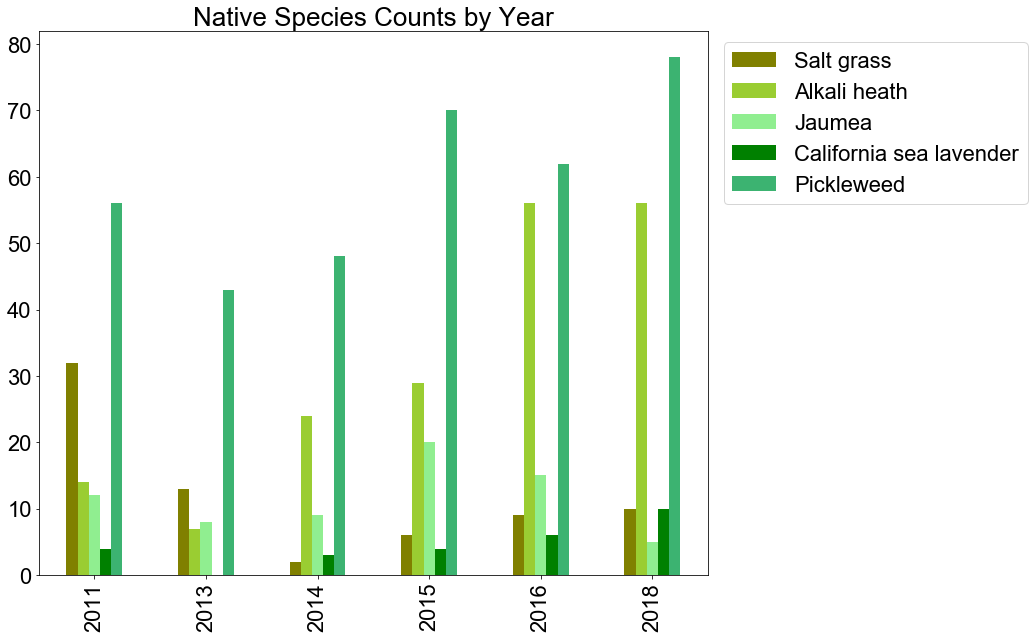

In [355]:

fig = plt.figure(1)
ax = fig.add_subplot(111)

a = native_df.groupby(['Year','Species']).agg({'Species': 'count'}).unstack()

a.plot(kind='bar', 
    stacked=False,
    xticks  = unique(df.Year.values), 
    color = ['olive','yellowgreen','lightgreen','g','mediumseagreen'],
    fontsize=22,
    ax=ax)
 
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, [
    'Salt grass',
    'Alkali heath',
    'Jaumea' ,
    'California sea lavender',
    'Pickleweed'], loc='upper center', bbox_to_anchor=(1.25,1), fontsize=22)

ax.set_title("Native Species Counts by Year", fontsize=26)
ax.set_xlabel("")
# show it
plt.savefig('NativeCounts.jpg', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()

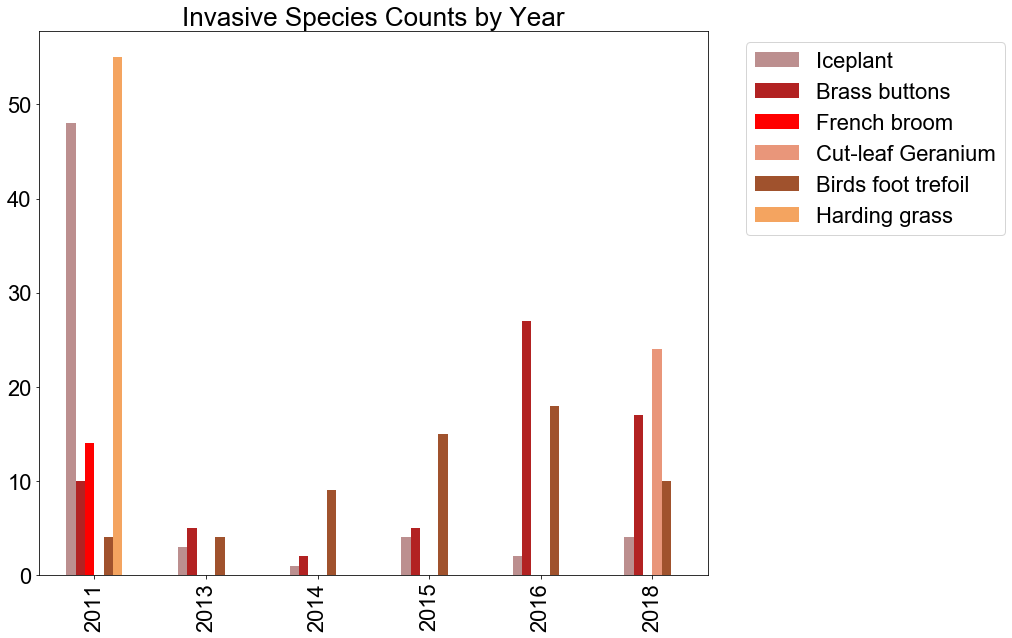

In [356]:

fig = plt.figure(1)
ax = fig.add_subplot(111)

a = inv_df.groupby(['Year','Species']).agg({'Species': 'count'}).unstack()

a.plot(kind='bar', 
    stacked=False,
    xticks  = unique(df.Year.values), 
    fontsize=22,
    color = ['rosybrown','firebrick','red','darksalmon','sienna','sandybrown'],
    ax=ax)
 
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, [
    'Iceplant', 
    'Brass buttons',
    'French broom',
    'Cut-leaf Geranium',
    'Birds foot trefoil', 
    'Harding grass'
    ], loc='upper center', bbox_to_anchor=(1.25,1), fontsize=22)

ax.set_title("Invasive Species Counts by Year", fontsize=26)
ax.set_xlabel("")
# show it
plt.savefig('InvasiveCounts.jpg', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()

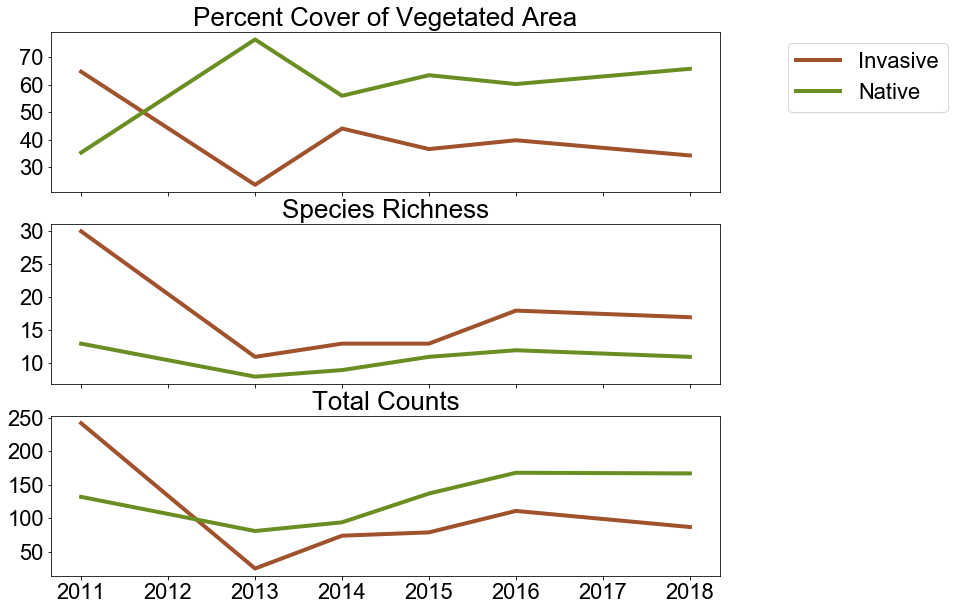

In [357]:

fig, (ax,ax2,ax3) = plt.subplots(3, 1, sharex=True, sharey=False)

a = IN_df['Percentage'].unstack()

a.plot(kind='line', 
    color = ['sienna','olivedrab'],
    title = "Percentage of Native/Invasive",
    fontsize=22,
    linewidth=4,
    ax=ax)
 
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, ['Invasive',
                          'Native'], 
                
    loc='upper center', bbox_to_anchor=(1.22,1), fontsize=22)

b = IN_df['Richness'].unstack()

b.plot(kind='line', 
    color = ['sienna','olivedrab'],
    title = "Species Richness",
    legend = False,
    fontsize=22,
    linewidth=4,
    ax=ax2)

c = IN_df['Species'].unstack()

c.plot(kind='line',
    color = ['sienna','olivedrab'],
    title = "Total Plant Counts",
    legend = False,
    fontsize=22,
    linewidth=4,
    ax=ax3)

ax.set_title("Percent Cover of Vegetated Area", fontsize=26)
ax2.set_title("Species Richness", fontsize=26)
ax3.set_title("Total Counts", fontsize=26)

ax3.set_xlabel("")
 
# show it
plt.savefig('StackedLines.jpg', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()

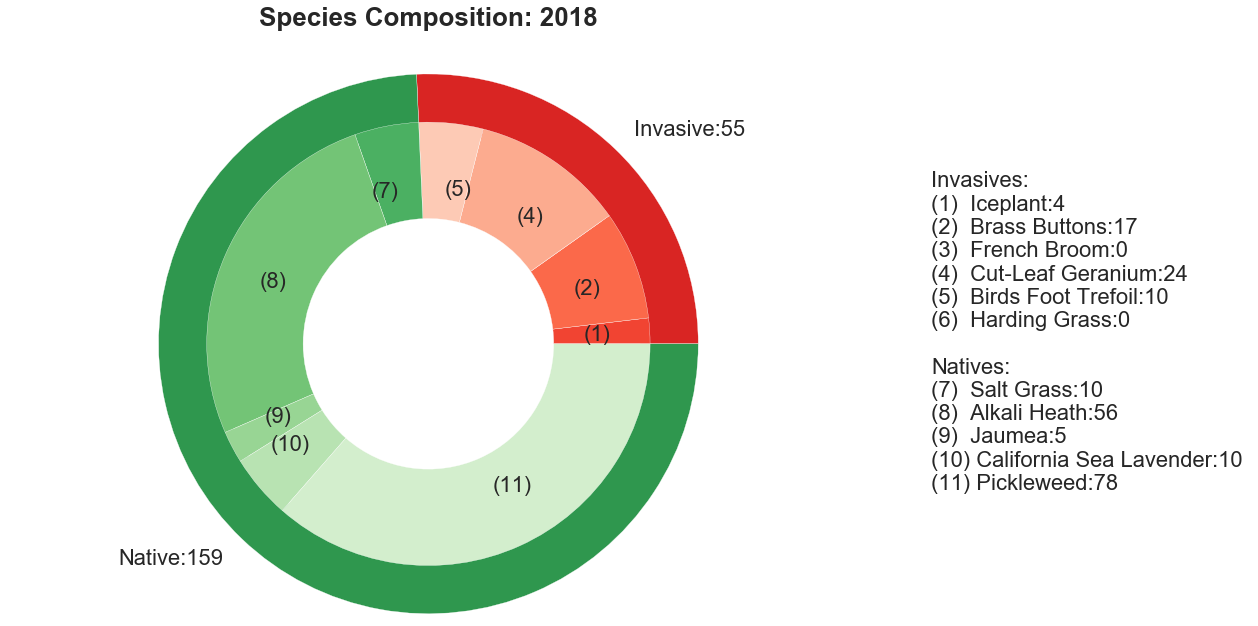

In [42]:
# Make data: I have 3 groups and 7 subgroups
yr = 2018

fig, ax = plt.subplots()

# Create colors
a, b =[plt.cm.Reds, plt.cm.Greens]

group_names=['Invasive Species', 'Native Species']

group_size= [len(inv_df.loc[(inv_df['Year'] == yr)]),
             len(native_df.loc[(native_df['Year'] == yr)])] #dynamic
        
group_names=['Invasive:'+str(group_size[0]), 
             'Native:'+str(group_size[1])]
                
cmb_g = pd.DataFrame({'names': group_names,
                      'size': group_size})

cmb_g.loc[(cmb_g['size'] == 0), 'names'] = ''
        
# SUBGROUPS        
        
subgroup_size=[len(inv_df.loc[(inv_df['Year'] == yr) & (inv_df['Species'] == 'CAREDU')]),
               len(inv_df.loc[(inv_df['Year'] == yr) & (inv_df['Species'] == 'COTCOR')]),
               len(inv_df.loc[(inv_df['Year'] == yr) & (inv_df['Species'] == 'GENMON')]),
               len(inv_df.loc[(inv_df['Year'] == yr) & (inv_df['Species'] == 'GERDIS')]),
               len(inv_df.loc[(inv_df['Year'] == yr) & (inv_df['Species'] == 'LOTCOR')]),
               len(inv_df.loc[(inv_df['Year'] == yr) & (inv_df['Species'] == 'PHAAQU')]),               
               
               len(native_df.loc[(native_df['Year'] == yr) & (native_df['Species'] == 'DISSPI')]),
               len(native_df.loc[(native_df['Year'] == yr) & (native_df['Species'] == 'FRASAL')]),
               len(native_df.loc[(native_df['Year'] == yr) & (native_df['Species'] == 'JAUCAR')]),
               len(native_df.loc[(native_df['Year'] == yr) & (native_df['Species'] == 'LIMCAL')]),
               len(native_df.loc[(native_df['Year'] == yr) & (native_df['Species'] == 'SALPAC')])
               ] #dynamic
        
subgroup_names=['(1)', 
                '(2)',
                '(3)',
                '(4)',
                '(5)',
                '(6)',
                
                '(7)', 
                '(8)',
                '(9)',
                '(10)',
                '(11)']
        
cmb_s = pd.DataFrame(
                {'names': subgroup_names,
                 'size': subgroup_size
                })

cmb_s.loc[(cmb_s['size'] == 0), 'names'] = ''
ax.axis('equal')


# First Ring (outside)
mypie, _ = ax.pie(group_size, radius=1.4, labels=cmb_g['names'], colors=[a(0.7), b(0.7)] )

plt.setp(mypie, width=0.3, edgecolor='white')
plt.setp(_, size=22)
    
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.4-0.25, labels=cmb_s['names'], labeldistance=0.7, colors=[
                   a(0.6), 
                   a(0.5),
                   a(0.4),
                   a(0.3),
                   a(0.2),
                   a(0.1),
    
                   b(0.6),
                   b(0.5),
                   b(0.4),
                   b(0.3),
                   b(0.2)])


plt.setp(mypie2, width=0.5, edgecolor='white')
plt.setp(_, size=22)

blue_patch = mpatches.Patch(color='white', label= 
                            'Invasives:'+ '\n'+
                            '(1)  Iceplant:'+str(subgroup_size[0]) + '\n'
                            '(2)  Brass Buttons:'+str(subgroup_size[1])+ '\n'
                            '(3)  French Broom:'+str(subgroup_size[2])+ '\n'
                            '(4)  Cut-Leaf Geranium:'+str(subgroup_size[3])+ '\n'
                            '(5)  Birds Foot Trefoil:'+str(subgroup_size[4])+ '\n'
                            '(6)  Harding Grass:'+str(subgroup_size[5])+ '\n'
                            + '\n'+
                            'Natives:'+ '\n'+
                            '(7)  Salt Grass:'+str(subgroup_size[6])+ '\n' 
                            '(8)  Alkali Heath:'+str(subgroup_size[7])+ '\n'
                            '(9)  Jaumea:'+str(subgroup_size[8])+ '\n'
                            '(10) California Sea Lavender:'+str(subgroup_size[9])+ '\n'
                            '(11) Pickleweed:'+str(subgroup_size[10])
                           )

plt.legend(handles=[blue_patch],loc='best', bbox_to_anchor=(1,.9), fontsize=22)


ax.set_title('Species Composition: '+ str(yr), size=26, va='baseline', weight='bold', y = 1.15)
#fig.subplots_adjust(top=0.85)
plt.tight_layout(rect=[0, 0.05, 1, 0.9])

plt.savefig('DONUT'+str(yr)+'.jpg', bbox_inches='tight')
 
# show it
plt.show()